SAS & HSE, Applied Time Series Forecasitng , Winter 2022

<font color="blue"> HW #1 </font>

<span style="color:black; font-size: 12pt"></span>

Alexey Romanenko,
<font color="blue">alexromsput@gmail.com</font>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.
- https://otexts.com/fpp2/expsmooth.html

**Оформление дз**: 
- Присылайте выполненное задание в гугл-форму https://forms.gle/Jafoe52VmyraPbgP7
- Выполненное дз сохраните в файл <Surname>_fall2021_hw1.ipynb, например, ivanov_fall2021_hw1.ipynb

**Вопросы**:
- Присылайте вопросы в slack в соответствующий канал

**Deadilne**: <font color="red"> 12-Feb-2022 11:59:59 pm CET </font>

В случае присланного решения позже дедлайна максимальный бал буде снижен согласно формуле

$$МаксимальныйБалл=\max\bigl(1/3,\log_2⁡(1.23 + 0.77 * max(0,(1-ДнейПослеДедлайна/14))) \bigr).$$
График зависимости максимально возможного балла за ДЗ от просрочки дедлайна приведён ниже:

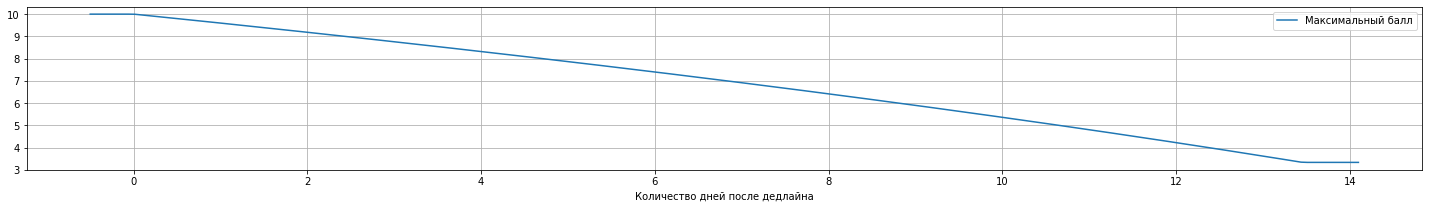

In [ ]:
import pandas as pd
import numpy as np
a = 2
ax = pd.DataFrame(data = [[x, min(10, 10*max(1/3, np.log(a-0.77 + 0.77*max(0, (1-x/14)))/np.log(a)))] for x in np.linspace(-0.5,14.1,200)], columns = ['Количество дней после дедлайна', 'Максимальный балл']).set_index('Количество дней после дедлайна').plot(figsize = (25,3), grid = True)

<h1 align="center">Check Questions (5%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Опишите, как изменяется адаптивная способность алгоритма Simple Exponential Smoothing при изменении параметра $\alpha$ от 0 до 1.

<Ответ>

**Вопрос 2**: Докажите равенство выражений в $\color{blue}{рекуррентной~форме}$ и в $\color{red} {форме~корректировке~на~ошибку}$ для модели Хольта.

$$        l_t = \color{blue}{\alpha y_t + (1-\alpha) (l_{t-1} + b_{t-1} )} = \color{red}{\hat y_{t} + \alpha e_t}$$ 

$$b_t = \color{blue}{\beta (l_{t} - l_{t-1} ) + (1-\beta) b_{t-1}} = \color{red}{b_{t-1}+ \alpha\beta e_t}.$$</td>

<Ответ>

**Вопрос 3**: Каким следует выбрать параметр сглаживания тренда $\beta$ в модели Хольта (линейный тренд) в случае, когда вы предсказываете временной ряд 1) с плавно меняющимя трендом; 2) стохастически меняющися трендом?

<Ответ>


<h1 align="center"> Practice</h1>

#1. reading data (5%)

Download data and prepare for following time series 
 * <span style="color:blue; font-family:'New Times Roman'; font-size:14pt"> description of the target ts you can find here  https://docs.google.com/spreadsheets/d/158tztQ-jFFErWMk7k3INnSs8tjDTWP9j1SBE-uxFfMw/edit#gid=1870131720 </span> sheet "Анализ временных рядов" column C ("ts")



In [ ]:
# start with this code
import pandas as pd
import numpy as np
from utils import InitExponentialSmoothing, build_forecast, plot_ts_forecast
from utils import qualityMAPE 

%matplotlib inline


# ts = pd.read_csv('???/mothly_ts.csv', sep=???, decimal=???, index_col=???, parse_dates=True, dayfirst=True)

# # Put your code below
# ts.plot(figsize=(15,5))

# 2. Build the Forecast with  SES (20%)

You need to apply SES model for the ts.
You can use code from seminars or you can write down your own code using any python lib.

Forecast delay $h=1$ for all point in this task.

* 0) Forecast the ts with SES $\alpha=.1$.
* 1) Split the ts to 4 equal parts: find the best param $\alpha$ of SES for the based on 3-rd part of ts (e.g. if time series includes date from 01Jan2020 till 31Dec2021 then 3rd part will be from 1Jul2020 till 30Sep2020). Is the optimal value close to 0 or 1? (use MAPE as a loss function).
* 2) Draw the forecast that correspond to SES with optimial value $\alpha$
     Conclude whether SES can be used for this TS? If can not than explain why.
* 3) Calculate MAPE loss of the best forecast of the ts based on 4-th part of the ts.

---



## 1) Search for the optimal $\alpha$ 

In [ ]:
ALPHA = ???
ESParamsArray = [{'alpha':alpha} for alpha in ALPHA]
FRC_ts = build_forecast(h=1, ts=???, alg_name =  ???, alg_title=???,params_array = ESParamsArray)

In [ ]:
# compare ES parameters
QualityStr = pd.DataFrame(index = ts.columns, columns = FRC_ts.keys())

ix = ts.loc[???].index
for param_cntr in sorted(QualityStr.columns):
    frc_ts = FRC_ts[param_cntr]
    QualityStr[param_cntr],_ = quality???(ts.loc[ix], frc_ts.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

## 2) draw the forecast with optimial value $\alpha $

In [ ]:
alg_name = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plot_ts_forecast(ts.loc[???], FRC_ts[alg_name].loc[???]
               , ts_num=???, alg_title=???)

** Question**
    * Does SES follow to the TS components?

## 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]

In [ ]:
quality???(ts.loc[???], FRC_ts[alg_name].loc[???])[0]

# 3. Winters model for Additive Seasonality (25%)
You need to realize ES model for TS with additive seasonality and then apply it to the ts.

You can use code from seminars or you can write down your own code using any python lib.


Forecast delay $h=1$ for all point in this task.

* 1) Realize Additive Winters model
* 2) Split the ts to 4 equal parts: find the best params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) for the based on 3-rd part of ts (e.g. if time series includes date from 01Jan2020 till 31Dec2021 then 3rd part will be from 1Jul2020 till 30Sep2020). Use MAPE as a loss function.
* 3) Draw the forecast that correspond optimal values $\alpha$ and $\gamma$ for the whole TS 
* 4) Calculate MAPE loss of the best forecast of the ts based on 4-th part of the ts. Compare it with accuracy of SES: is it better? 
* 5) Based on results of 3) and 4) conclude whether Additive Winter's ES is appropriate for this TS.

In [ ]:
# Start with this code
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    gamma = Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = ## put foreast of the model here
    
    l= # initialize ts level 
    s= # initalize seasonality values (it must be vector of lenth p)
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= # initialize 
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= # initialize 
 
            l = # recurrent smoothing of level 
            s[cntr % p] = # recurrent smoothing of seasonality
            
        FORECAST[cntr+h] = ??
    return FORECAST

In [ ]:
# Put your code here


# 4. Theil-ts model for TS with linear trend and seasonality (25%)
You need to realize Theil-ts model and then use it for forecasting the ts.

You can use code from seminars or you can write down your own code using any python lib.


Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model
* 2) Split the ts to 4 equal parts: find the best params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) for the based on 3-rd part of ts (e.g. if time series includes date from 01Jan2020 till 31Dec2021 then 3rd part will be from 1Jul2020 till 30Sep2020). Use MAPE as a loss function.
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$
* 4) Calculate MAPE loss of the best forecast of the ts based on 4-th part of the ts. Compare it with accuracy of Additive Winters model: is it better than the last one? 
* *5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

In [ ]:
# Put your code here

# 5. Non-additive model of ES (25%)
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) or/and damped-trend component and then use it for forecasting of the ts

You can use code from seminars or you can write down your own code using any python lib.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M), ESM(Md,M) model.
* 2) Split the ts to 4 equal parts: find the best params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) for the based on 3-rd part of ts (e.g. if time series includes date from 01Jan2020 till 31Dec2021 then 3rd part will be from 1Jul2020 till 30Sep2020). Use MAPE as a loss function.
Note: if you seelct damped trend model then you can set  $\phi$ value expertly (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params. 
* 4) Calculate accuracy of the forecast of TS based on 4-th part of the ts. Compare it with accuracy of Additive Winters model and Theil-Wage model, which model is the best?
* 5) Will be results the same if forecas horizon is different (h = seasonlaity period of data)? Please give reasons for your answer.

In [ ]:
# Put your code here